# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_combined = pd.merge(study_results, mouse_metadata, how = 'left', on = 'Mouse ID')

# Display the data table for preview
mouse_study_combined

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [31]:
# Checking the number of mice.
mouse_study_combined['Mouse ID'].nunique()


249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

unique_count = mouse_study_combined.groupby(["Mouse ID", "Timepoint"], as_index= False).count()
duplicate_id = unique_count[(unique_count["Weight (g)"] > 1)]
duplicate_id['Mouse ID'].unique()


array(['g989'], dtype=object)

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_dup = mouse_study_combined[(mouse_study_combined["Mouse ID"] == 'g989')]
mouse_study_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_dedup = mouse_study_combined[(mouse_study_combined["Mouse ID"] != 'g989')]
mouse_study_dedup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [35]:
# Checking the number of mice in the clean DataFrame.
mouse_study_dedup['Mouse ID'].nunique()

248

## Summary Statistics

In [36]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regiment_groupby = mouse_study_dedup.groupby(['Drug Regimen'])
mean = regiment_groupby['Tumor Volume (mm3)'].mean()
median = regiment_groupby['Tumor Volume (mm3)'].median()
var = regiment_groupby['Tumor Volume (mm3)'].var()
std = regiment_groupby['Tumor Volume (mm3)'].std()
sem = regiment_groupby['Tumor Volume (mm3)'].sem()

volume_statistics = pd.DataFrame(
    {
                    "Mean Tumor Volume": mean
                   ,"Median Tumor Volume":  median
                   ,"Tumor Volume Variance": var
                   ,"Tumor Volume Std. Dev.": std
                   ,"Tumor Volume Std. Dev.": std
                   ,"Tumor Volume Std. Err.": sem
    }    
                                )

volume_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [37]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

volume_agg = regiment_groupby['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
volume_agg

# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regiment', ylabel='Number of Observed Mouse Timepoints'>

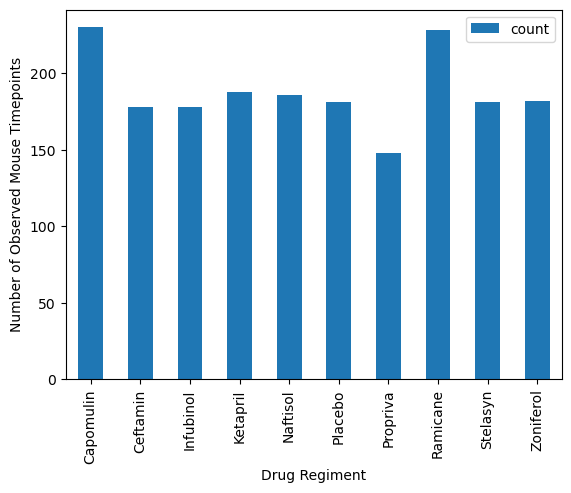

In [45]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_and_timepoints = regiment_groupby(['Mouse ID'].agg(['count'])
xlabel = 'Drug Regiment'
ylabel = 'Number of Observed Mouse Timepoints'
drug_and_timepoints.plot(kind = 'bar', xlabel=xlabel, ylabel = ylabel)

Text(0, 0.5, 'Number of Mice')

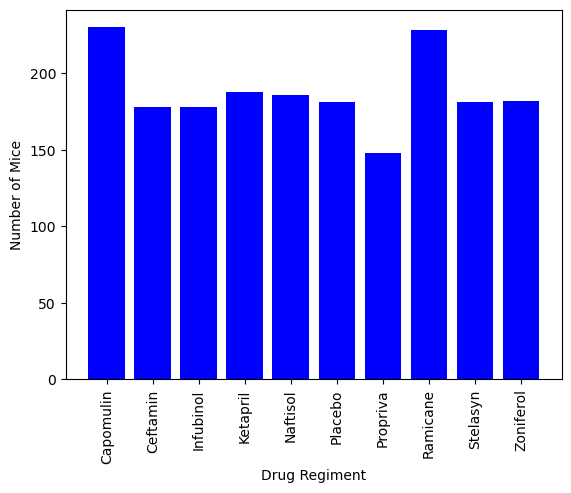

In [72]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regiment_count = mouse_study_dedup.groupby(["Drug Regimen"], as_index= False).count()
# regiment_count
# regiment_count.columns
fig,ax = plt.subplots()
x_axis = regiment_count['Drug Regimen']
y_values = regiment_count['Mouse ID']
plt.bar(x_axis, y_values, color="b", align="center")
plt.xticks(rotation = 90)
ax.set_xlabel('Drug Regiment')
ax.set_ylabel('Number of Mice')

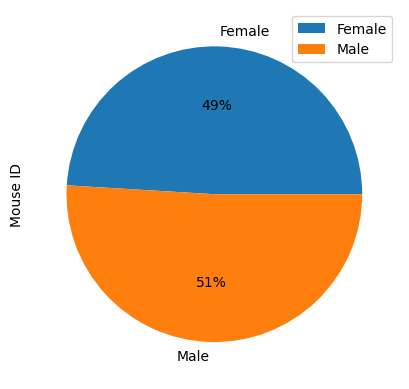

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female = mouse_study_dedup.groupby(["Sex"]).count().plot(kind = 'pie', autopct='%1.0f%%', y = 'Mouse ID')


Text(0, 0.5, 'Sex')

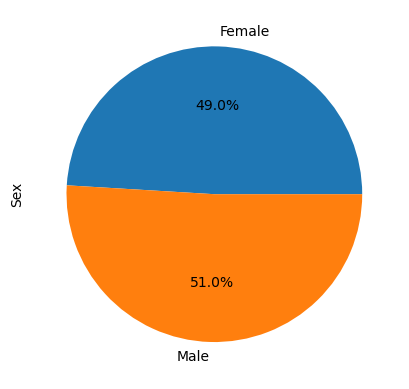

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_count = mouse_study_dedup.groupby(['Sex'], as_index= False).count()
labels =  sex_count['Sex']
sizes =  sex_count['Mouse ID']
fig,ax = plt.subplots()
plt.pie(sizes, labels=labels,autopct="%1.1f%%")
ax.set_ylabel('Sex')


## Quartiles, Outliers and Boxplots

In [116]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

regiment_limited = mouse_study_dedup.loc[mouse_study_dedup['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
regiment_limited

# Start by getting the last (greatest) timepoint for each mouse

regiment_limited_groupby = regiment_limited.groupby(['Mouse ID']).max()
regiment_limited_volume = regiment_limited_groupby[['Tumor Volume (mm3)','Timepoint']]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

study_limited_combined = pd.merge(regiment_limited, regiment_limited_volume, how = 'left', on = 'Mouse ID')
study_limited_combined

,Mouse ID,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3)_y,Timepoint_y
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.651331,45
1,c326,0,45.000000,0,Infubinol,Female,18,25,45.000000,5
2,c139,0,45.000000,0,Infubinol,Male,11,28,72.226731,45
3,v339,0,45.000000,0,Infubinol,Male,20,26,46.250112,5
4,a577,0,45.000000,0,Infubinol,Female,6,25,57.031862,30
...,...,...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17,46.910892,45
810,i177,45,33.562402,3,Ramicane,Male,10,18,45.000000,45
811,r944,45,41.581521,2,Capomulin,Male,12,25,47.373423,45
812,u364,45,31.023923,3,Capomulin,Male,18,17,47.212200,45


In [128]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

study_limited_loop = study_limited_combined[['Mouse ID','Drug Regimen','Tumor Volume (mm3)_x']]
study_limited_loop

for treatment in treatments:
    study_limited_loop_dfs = study_limited_loop.loc[study_limited_loop['Drug Regimen']== treatment]
        
    quartiles = study_limited_loop_dfs['Tumor Volume (mm3)_x'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = study_limited_loop_dfs.loc[(study_limited_loop_dfs['Tumor Volume (mm3)_x'] < lower_bound) | (study_limited_loop_dfs['Tumor Volume (mm3)_x'] > upper_bound)]
    print(f'The potential outliers for {treatment} are {outliers}')

The potential outliers for Capomulin are     Mouse ID Drug Regimen  Tumor Volume (mm3)_x
703     s185    Capomulin             25.472143
794     s185    Capomulin             23.343598
The potential outliers for Ramicane are     Mouse ID Drug Regimen  Tumor Volume (mm3)_x
782     k403     Ramicane             22.050126
The potential outliers for Infubinol are Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)_x]
Index: []
The potential outliers for Ceftamin are Empty DataFrame
Columns: [Mouse ID, Drug Regimen, Tumor Volume (mm3)_x]
Index: []


<Axes: title={'center': 'Tumor Volume (mm3)_x'}, xlabel='Drug Regimen'>

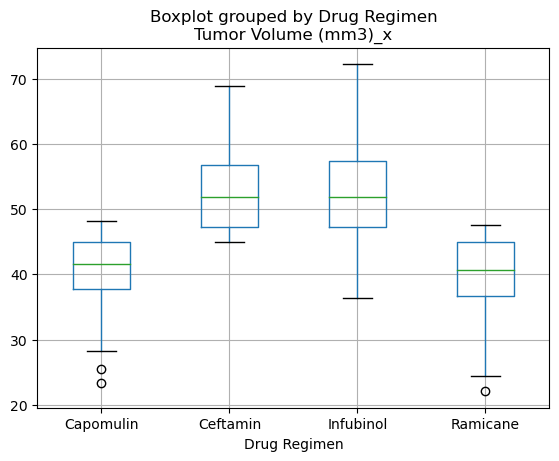

In [131]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
study_limited_combined.boxplot(by = 'Drug Regimen', column = 'Tumor Volume (mm3)_x')

## Line and Scatter Plots

<Axes: title={'center': 'Cap treatment of mouse b128'}, xlabel='Timepoint', ylabel='Tumor Volume'>

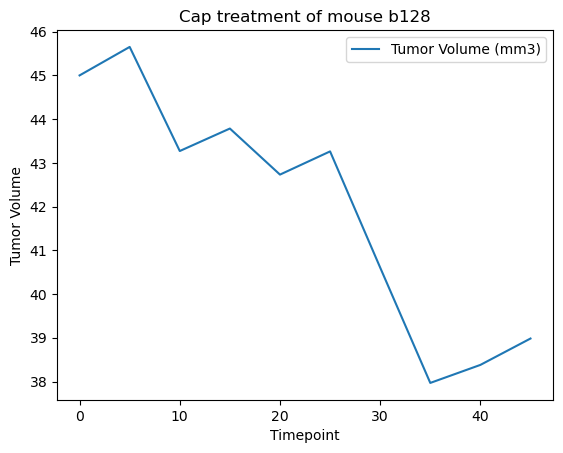

In [146]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


mouse_capomulin = mouse_study_dedup.loc[mouse_study_dedup['Drug Regimen'] == 'Capomulin']
mouse_b128 = mouse_capomulin.loc[mouse_study_dedup['Mouse ID'] == 'b128']
mouse_b128 = mouse_b128[['Mouse ID','Timepoint','Tumor Volume (mm3)']]
mouse_b128

title = 'Cap treatment of mouse b128'
xlabel = 'Timepoint'
ylabel = 'Tumor Volume'
mouse_b128.plot(x = 'Timepoint', xlabel = xlabel, ylabel = ylabel, title=title)




<Axes: title={'center': 'All mice treated with Capomulin: weight vs tumor volume'}, xlabel='Weight', ylabel='Tumor Volume'>

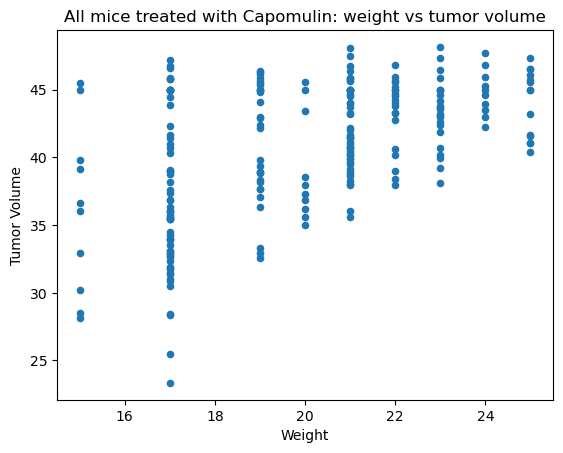

In [153]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_capomulin

title = 'All mice treated with Capomulin: weight vs tumor volume'
xlabel = 'Weight'
ylabel = 'Tumor Volume'

mouse_capomulin.plot.scatter(x = 'Weight (g)', y = 'Tumor Volume (mm3)', title = title, xlabel = xlabel, ylabel = ylabel)



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.53


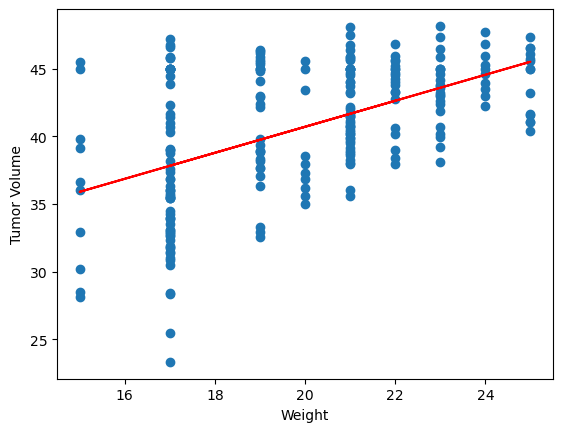

In [157]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
import scipy.stats as st

weight = mouse_capomulin['Weight (g)']
tumor_volume = mouse_capomulin['Tumor Volume (mm3)']

correlation = st.pearsonr(weight,tumor_volume)

print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

x_values = mouse_capomulin['Weight (g)']
y_values = mouse_capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()